In [1]:
import sys
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/bagpype/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')
from functions import *
from import_subtypes import *

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
%config InlineBackend.figure_format = 'svg' # makes the plots HD in the notebook
plt.rcParams["figure.autolayout"] = True # enables tigh layout. Better multiplots

Resting State Include: sample1_rest_include, sample2_rest_include, full_sample_rest_include /n sample1_rest_include_idsub, sample2_rest_include_idsub, sample2_rest_idsub, full_sample_rest_include_idsub
Resting State Combined: sample1_rest_combined, sample2_rest_combined, full_sample_rest_combined /n sample1_rest_combined_idsub, sample2_rest_combined_idsub, full_sample_rest_combined_idsub
Resting State Dont Include: full_sample_rest_dont_include /n full_sample_rest_dont_include_idsub


In [2]:
full_sample_rest_dont_include.iloc[:, 2:]

#sample1_rest_include.iloc[:, 93:]

#sample1_rest_include

,ad_ad,ad_cgc,ad_ca,ad_dt,ad_dla,ad_fo,ad_n,ad_rspltp,ad_smh,ad_smm,...,vs_vtdclh,vs_crcxrh,vs_thprh,vs_cderh,vs_ptrh,vs_plrh,vs_hprh,vs_agrh,vs_aarh,vs_vtdcrh
0,-0.035092,0.002613,0.305524,0.132976,-0.139854,-0.103502,0.022689,0.043401,-0.043870,-0.185966,...,0.221737,-0.364404,0.004572,0.028422,-0.022615,-0.056996,-0.113979,0.363398,0.225292,-0.092906
1,0.042077,0.038674,0.020921,0.051487,-0.040596,0.027972,0.003105,0.023952,0.055706,-0.003394,...,0.127261,-0.014521,-0.058574,0.027367,-0.188169,0.092172,0.090827,0.188963,0.054035,-0.202930
2,0.071629,0.106272,-0.018175,-0.033070,-0.010772,-0.028400,-0.002457,-0.051210,-0.038566,0.111961,...,0.037578,-0.120017,0.029737,0.051622,-0.058020,-0.013919,0.144985,0.048525,0.006014,0.006490
3,0.078439,0.105829,-0.115600,-0.068982,0.013790,0.044595,-0.066614,-0.192873,0.067085,0.118439,...,-0.099398,-0.133273,-0.013656,-0.052569,-0.231932,-0.116934,0.130423,0.039664,0.135795,-0.163721
4,0.071805,0.029189,-0.027834,0.037720,-0.031075,0.060735,0.098742,0.160805,0.010906,-0.061534,...,-0.146612,0.086869,-0.031990,-0.013088,-0.105584,0.118035,0.112070,-0.129410,0.037658,0.085286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.124062,0.026761,-0.043470,-0.009784,-0.060066,-0.048449,-0.015212,-0.069426,0.030428,-0.004695,...,-0.064267,-0.015711,-0.009345,-0.022019,-0.021930,-0.045053,-0.063514,-0.029335,-0.045553,0.052612
1289,0.038406,0.067585,-0.106890,-0.074796,0.046383,-0.012883,-0.034190,-0.130644,-0.005042,0.013086,...,-0.049884,0.020597,-0.023708,0.000710,0.091417,0.015386,-0.001900,0.068989,-0.102001,0.021457
1290,-0.005012,-0.026720,0.042819,0.039774,-0.086074,0.031753,0.027522,-0.094668,-0.009389,-0.046488,...,-0.023637,-0.048024,0.023592,-0.008186,-0.106173,0.043041,0.010345,0.208938,0.007335,-0.066438
1291,0.165589,0.064894,0.081792,-0.045360,-0.097724,-0.051761,-0.023949,-0.034813,0.074901,0.173265,...,0.139709,0.029847,0.037127,0.003713,0.022915,-0.102289,-0.087713,0.132409,-0.054440,0.108400


In [3]:
sample_idsubs = pd.concat([sample1_rest_include_idsub.assign(sample = 'sample1'),
          sample2_rest_include_idsub.assign(sample = 'sample2')])


sample_idsubs.to_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/profiles/samples_rest_include_idsub.csv', index=False)

In [4]:
def maxcor(data1, data2, what, top, size, move, outpath=None):
    
    def get_redundant_pairs(df):
        '''Get diagonal and lower triangular pairs of correlation matrix'''
        pairs_to_drop = set()
        cols = df.columns
        for i in range(0, df.shape[1]):
            for j in range(0, i+1):
                pairs_to_drop.add((cols[i], cols[j]))
        return pairs_to_drop

    def get_top_abs_correlations(df):
        #au_corr = df.abs().unstack()
        au_corr = df.unstack()
        labels_to_drop = get_redundant_pairs(df)
        au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
        return au_corr[0:df.shape[0]]

    df1_cor = data1.drop(['ID'], axis =1).groupby('Subtype').mean()
    df2_cor = data2.drop(['ID'], axis =1).groupby('Subtype').mean()

    cors = pd.DataFrame(np.corrcoef(df1_cor ,df2_cor))
    
    #print(cors)

    sample1 = ['Subtype ' + item + '-S1' for item in  list(map(str, list(range(1, top+1))))]
    sample2 = ['Subtype ' + item + '-S2'for item in  list(map(str, list(range(1, top+1))))]

    cors.columns = sample1 + sample2
    cors.index = sample1 + sample2

    cor_list = list(pd.DataFrame(get_top_abs_correlations(cors)[:top]).T.columns)

    yorder=[]
    xorder=[]
    for i in cor_list:
        y = list(i)[0].split(",",1)[0]#.split("-",1)[0]
        x = list(i)[1].split(",",1)[0]#.split("-",1)[0]
        yorder.append(y)
        xorder.append(x)

    %matplotlib inline
    sns.set(font='Arial')
    plt.rcParams['svg.fonttype'] = 'none'
    style = sns.axes_style('white')
    style.update(sns.axes_style('ticks'))
    style['xtick.major.size'] = .5
    style['ytick.major.size'] = .5
    sns.set(font_scale=1.2)
    plt.figure(figsize=(14,7))
    diag = np.array(round(get_top_abs_correlations(cors)[:top],3))
    mat = pd.DataFrame(np.diag(diag))
    mat.columns = xorder
    mat.index = yorder

    labels = mat.columns.tolist()
    ax = sns.heatmap(mat, cmap=['white', "red"], square=True,
                     linecolor='white', linewidths=0.5,
                     cbar=False)


    ax.invert_xaxis()
    for i, label in enumerate(diag):
        ax.text(i + move, i + .5, label, ha='right', va='center', weight='bold', size = size)

    plt.xticks(rotation = 25, ha = 'right', rotation_mode='anchor', weight='bold', size = size)
    plt.yticks(rotation = 25, ha = 'right', rotation_mode='anchor', weight='bold', size = size)
    
    plt.title("Max Correlations Across " + what + " Subtypes", fontweight='bold', size= size)
    plt.gca().invert_xaxis()
    #ax.set_xticklabels(order)
    #ax.set_yticklabels(order)
    print(mat)
    plt.show()
    
def showmax(data1, data2, cols, title, nsubs, font_size, move):
    
    def normalize(df, cols):
        
        result = df.copy()
        
        for feature_name in cols:
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        return result

    from scipy import stats

    test1 = data1.copy()
    test1[cols] = stats.zscore(test1[cols])

    test2 = data2.copy()
    test2[cols] = stats.zscore(test2[cols])
    
    maxcor(test1, test2, title, nsubs, font_size, move)
    

In [5]:
path = '/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/subtype_data/baseline'


sample1_rest_include_fd = read_subtype(f'{path}/sample1_rest_baseline_07282023_include_fd/Output/Results/sample1_rest_baseline_07282023_include_fd_Full_Subtypes.csv')
sample1_rest_include_fd= rename_subtype(sample1_rest_include_fd, 3, 2, 4, 1) 
sample1_rest_include_fd_idsub = sample1_rest_include_fd[['ID', 'Subtype']]

sample2_rest_include_fd = read_subtype(f'{path}/sample2_rest_baseline_07282023_include_fd/Output/Results/sample2_rest_baseline_07282023_include_fd_Full_Subtypes.csv')
sample2_rest_include_fd = rename_subtype(sample2_rest_include_fd, 4, 3, 1, 2) 
sample2_rest_include_fd_idsub = sample2_rest_include_fd[['ID', 'Subtype']]

              Subtype 3-S2  Subtype 4-S2  Subtype 1-S2  Subtype 2-S2
Subtype 3-S1           1.0         0.000         0.000         0.000
Subtype 4-S1           0.0         0.995         0.000         0.000
Subtype 1-S1           0.0         0.000         0.991         0.000
Subtype 2-S1           0.0         0.000         0.000         0.966


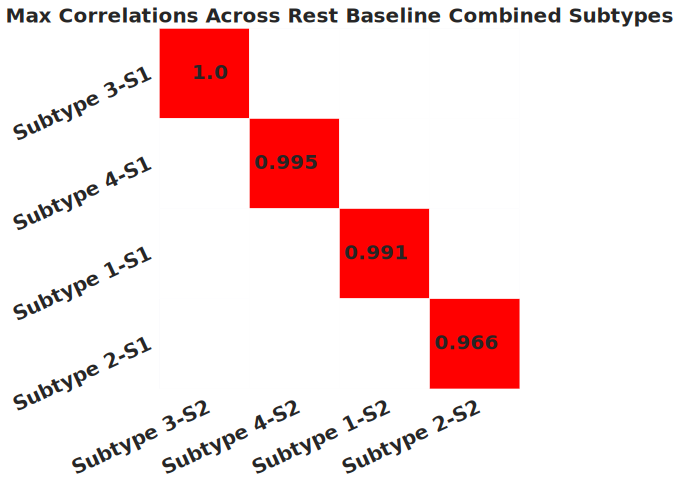

              Subtype 3-S2  Subtype 4-S2  Subtype 1-S2  Subtype 2-S2
Subtype 3-S1           1.0         0.000         0.000         0.000
Subtype 4-S1           0.0         0.998         0.000         0.000
Subtype 1-S1           0.0         0.000         0.997         0.000
Subtype 2-S1           0.0         0.000         0.000         0.987


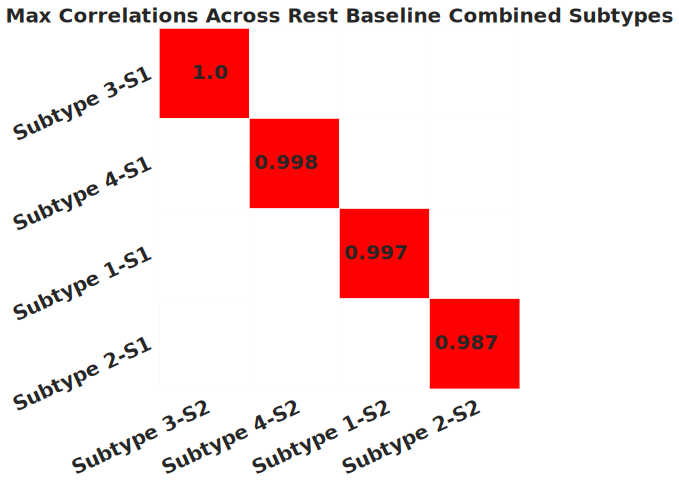

Sample 1 Adjusted Rand Index: 0.783
Sampe 2 Adjusted Rand Index: 0.835


In [6]:
rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
#rest_cols 
showmax(sample1_rest_include, sample1_rest_include_fd, rest_cols,  "Rest Baseline Combined",  4, 20, .75)
showmax(sample2_rest_include, sample2_rest_include_fd, rest_cols,  "Rest Baseline Combined",  4, 20, .75)

from sklearn.metrics import adjusted_rand_score
sample = pd.merge(sample1_rest_include_fd_idsub, sample1_rest_include_idsub, on='ID')
# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(sample.Subtype_x, sample.Subtype_y)
print("Sample 1 Adjusted Rand Index:", round(ari, 3))

from sklearn.metrics import adjusted_rand_score
sample = pd.merge(sample2_rest_include_fd_idsub, sample2_rest_include_idsub, on='ID')
# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(sample.Subtype_x, sample.Subtype_y)
print("Sampe 2 Adjusted Rand Index:", round(ari, 3))

In [14]:
from sklearn.metrics import adjusted_rand_score
sample = pd.merge(sample1_rest_include_fd_idsub, sample1_rest_include_idsub, on='ID')
# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(sample.Subtype_x, sample.Subtype_y)
print("Adjusted Rand Index:", round(ari, 3))

Adjusted Rand Index: 0.783


              Subtype 3-S2  Subtype 1-S2  Subtype 4-S2  Subtype 2-S2
Subtype 3-S1         0.999         0.000         0.000          0.00
Subtype 1-S1         0.000         0.997         0.000          0.00
Subtype 4-S1         0.000         0.000         0.996          0.00
Subtype 2-S1         0.000         0.000         0.000          0.99


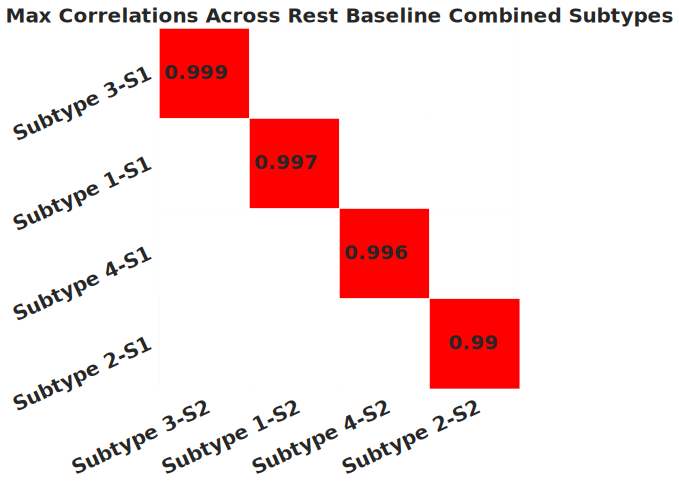

In [15]:

rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
#rest_cols 
showmax(sample1_rest_include, full_sample_rest_include, rest_cols,  "Rest Baseline Combined",  4, 20, .75)

              Subtype 3-S2  Subtype 1-S2  Subtype 4-S2  Subtype 2-S2
Subtype 3-S1         0.996          0.00         0.000         0.000
Subtype 1-S1         0.000          0.99         0.000         0.000
Subtype 4-S1         0.000          0.00         0.986         0.000
Subtype 2-S1         0.000          0.00         0.000         0.974


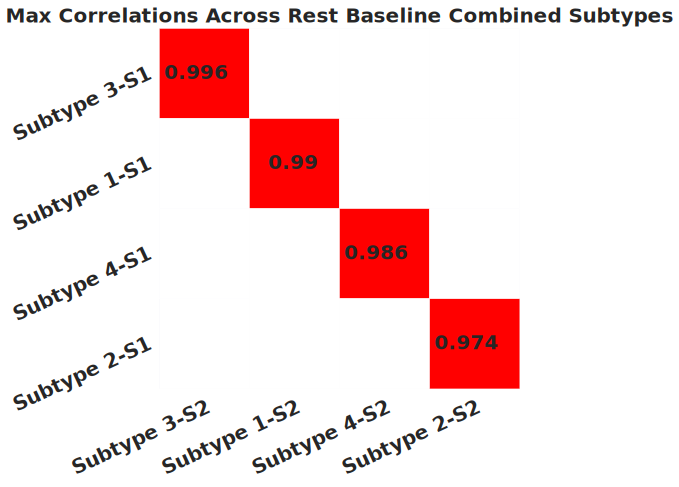

In [16]:
rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
showmax(sample1_rest_combined, sample2_rest_combined, rest_cols,  "Rest Baseline Combined",  4, 20, .75)

              Subtype 3-S2  Subtype 1-S2  Subtype 4-S2  Subtype 2-S2
Subtype 3-S1         0.965         0.000         0.000         0.000
Subtype 1-S1         0.000         0.937         0.000         0.000
Subtype 4-S1         0.000         0.000         0.711         0.000
Subtype 2-S1         0.000         0.000         0.000         0.662


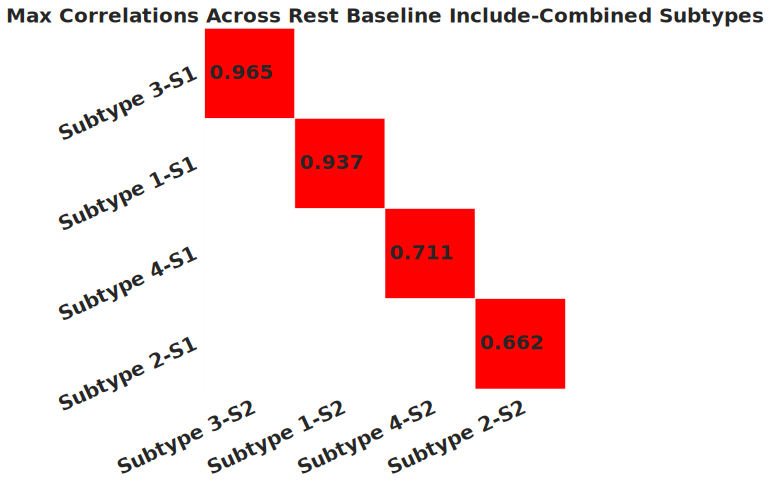

In [17]:
rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
showmax(full_sample_rest_combined, full_sample_rest_dont_include, rest_cols,  "Rest Baseline Include-Combined",  4, 20, .75)

              Subtype 4-S2  Subtype 3-S2  Subtype 1-S2  Subtype 2-S2
Subtype 4-S1         0.998         0.000         0.000         0.000
Subtype 3-S1         0.000         0.997         0.000         0.000
Subtype 1-S1         0.000         0.000         0.996         0.000
Subtype 2-S1         0.000         0.000         0.000         0.994


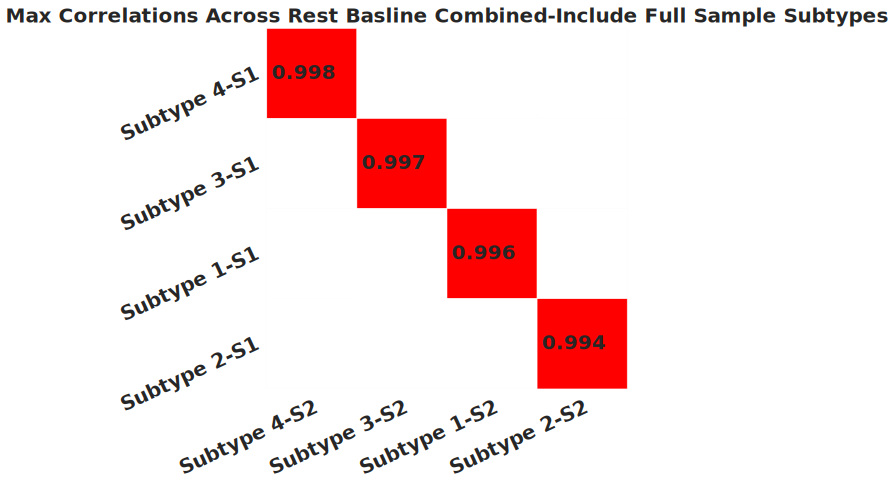

In [18]:
rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
showmax(full_sample_rest_combined, full_sample_rest_include, rest_cols,  "Rest Basline Combined-Include Full Sample",  4, 20, .75)

              Subtype 3-S2  Subtype 1-S2  Subtype 4-S2  Subtype 2-S2
Subtype 3-S1         0.946         0.000         0.000         0.000
Subtype 1-S1         0.000         0.911         0.000         0.000
Subtype 4-S1         0.000         0.000         0.707         0.000
Subtype 2-S1         0.000         0.000         0.000         0.623


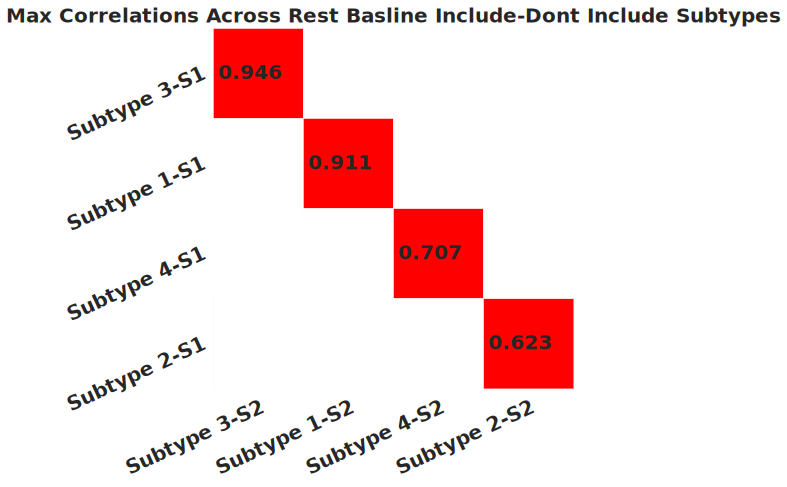

In [19]:
rest_cols = sample1_rest_include.iloc[:, 2:].columns.to_list()
showmax(full_sample_rest_dont_include, full_sample_rest_include, rest_cols,  "Rest Basline Include-Dont Include",  4, 20, .75)

In [20]:
def class_report(datatype):
    
    path = f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/classification_analysis/outputs/{datatype}/{datatype}_class_report.csv'
    classification = (pd.read_csv(path)
                       .rename({'Unnamed: 0':'Metrics'},axis=1).T.reset_index())

    classification.columns = classification.loc[0]
    classification = classification.drop(0)

    numeric_cols = ['precision', 'recall', 'f1-score', 'support']
    classification[numeric_cols] = (classification[numeric_cols]
                                    .apply(lambda x: pd.to_numeric(x, errors='coerce'))
                                    .round(3)
                                   )
    return classification

def pull(datatype):
    
    pull_cols = (pd.read_csv(f'/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/classification_analysis/outputs/{datatype}/{datatype}_ft_cols.csv')
                ['ft_cols']
               ).to_list()
    return pull_cols

def msd(data, group, column): 

    grouped_data = data[[group] + [column]]
    grouped_data.iloc[:, 1:] = grouped_data.iloc[:, 1:].apply(pd.to_numeric)
    grouped_data = grouped_data.groupby(group).agg(['mean', 'std']).reset_index()

    col_name = grouped_data.columns[1][0] + "_msd"

    grouped_data[col_name] = grouped_data.iloc[:, 1].apply(lambda x: f'{x:.2f}') + grouped_data.iloc[:, 2].apply(lambda x: f' ({x:.2f})')

    grouped_data = pd.DataFrame(grouped_data[[col_name]].T)
    # Rename the columns
    grouped_data.columns = [f'{group} {i+1}' for i in range(len(grouped_data.columns))]
    grouped_data = grouped_data.reset_index(drop=True)
    grouped_data = grouped_data.rename(index={0: column})

    return grouped_data


def get_subtype_means(sample):
    
    sample_means=[]
    for i in sample.iloc[:,2:].columns:
        sample[i] = (sample[i] - sample[i].mean())/sample[i].std(ddof=0)
        sample_means.append(msd(sample, 'Subtype', i))

    return pd.concat(sample_means).reset_index().rename({'index':'Name'}, axis=1)


def data_desc(url, url2=None, pull_list=None):
    
    dict_df = pd.read_html(url)[3]
    
    if url2 is not None:
        dict_df2 = pd.read_html(url2)[3]
        dict_df = pd.concat([dict_df, dict_df2])
    
    output = (dict_df[['Element Name','Description']]
     .rename({'Element Name':'Name'}, axis=1)
              .fillna('')
    )
    
    if pull_list is not None:
        output = output.query('Name not in @pull_list')
        
    return output.reset_index(drop=True)

strings_to_filter = ['subjectkey','src_subject_id','interview_date','interview_age','sex','eventname']
    

# Rest --------------------------------------------------------------------------------------------------
rest_url = 'https://nda.nih.gov/data_structure.html?short_name=abcd_betnet02'
rest_sub_cort = 'https://nda.nih.gov/data_structure.html?short_name=mrirscor02'

rest_remove = ['subjectkey','src_subject_id','interview_date','interview_age','sex','eventname',
            'visitid','tr','numtrs','nvols','stnvols','stcgnvols','ntpoints','meanmn','maxmn',
            'meantrans','maxtrans','meanrot','maxrot', 'motion']

rest_dict = (data_desc(rest_url, rest_sub_cort)
             .query('not Name.str.contains("|".join(@rest_remove))', engine='python'))

rest_dict.Name = (rest_dict.Name
                  .str.replace('rsfmri_cor_ngd_', '', regex=True)
                  .str.replace('rsfmri_c_ngd_', '', regex=True)
                  .str.replace('_scs_', '_', regex=True)
                  .str.replace('_ngd_', '_', regex=True)
                 )

rest_dict.Description = (rest_dict.Description
                         .str.replace('Average correlation between ', '', regex=True)
                         .str.replace(' network ', '', regex=True)
                         .str.replace('and', '_', regex=True)
                         .str.replace('and', '_', regex=True)
                         .str.replace('h_', 'hand', regex=True)
                         .str.replace('_ ', '_', regex=True)
                         .str.replace('_ASEG ROI', '_', regex=True)
                         .str.replace(' ASEG ROI ', '_', regex=True)
                         .str.replace('network', '', regex=True)
                         .str.replace('_ ', '_', regex=True)
                         .str.replace('dorsal ', 'dorsal-', regex=True)
                         .str.replace('mouthand', 'mouth_', regex=True)
                         .str.replace(' hand', '-hand', regex=True)
                         .str.replace('"none"', 'none', regex=True)
                        )

rest_dict_names = sample1_rest_include.iloc[:,2:].columns.to_list()

rest_dict = (rest_dict.query('Name.str.contains("|".join(@rest_dict_names))', engine='python')
             .reset_index(drop=True))

IndexError: list index out of range

In [ ]:
rest_names = pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/rest_var_names.csv')

In [ ]:
#rest 
#rest_pull = pull('rest')
#sample1_rest_pull = sample1_rest[['ID', 'Subtype']+rest_pull]
#sample2_rest_pull = sample2_rest[['ID', 'Subtype']+rest_pull]
#rest_both = pd.concat([sample1_rest_pull.assign(Sample = 'Sample1'), sample2_rest_pull.assign(Sample = 'Sample2')])
#rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']
#line_plot(rest_both, rest_pull, rest_colors, (10,4), -1.5, 1.5, save='rest/rest_baseline')

rest_pull = sorted(pull('rest'))

In [21]:
def line_plot(data, plot_vars, ops_cols,figsize, miny, maxy, n_clust, save=None):
    sns.set(rc={'figure.figsize':(15,10)})
    #columns = data.columns
    #columns=columns.str.replace('vs', 'visual', regex=True)
        
    from sklearn.cluster import AgglomerativeClustering
    
    cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=n_clust)
    cluster.fit_predict(data[plot_vars].T)
    order = pd.concat([pd.DataFrame(cluster.labels_), pd.DataFrame(plot_vars)], axis = 1)
    order.columns = ['order', 'var']
    order = order.sort_values(by = 'order')
    var_order = list(order['var'])
    
    data = data[['Subtype', 'Sample'] + var_order]
    
    #for col in var_order:
    #    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

    data_long = data.melt(id_vars = ['Subtype', 'Sample'])
    plt.style.use('fast') 
    sns.set_style("white")
    plt.figure(figsize=figsize)
    
    ax = sns.lineplot(data=data_long,
                      x="variable", y="value",
                      hue="Subtype", style= 'Sample', 
                      palette=ops_cols, 
                      sort= True,  
                      linewidth=2, 
                     legend=False
                     )

    #ax.grid(axis='x')
    plt.xticks(rotation = 90, ha = 'right', rotation_mode='anchor', size = 10)
    plt.yticks(size = 10)
    
    #legend = plt.legend(title = None, loc='center left', bbox_to_anchor=(1, 0.5))
    #legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=3)

    #for label in legend.get_texts():
    #    label.set_fontsize(10)
    
    plt.ylim((miny,maxy)) 
    plt.tight_layout()
    sns.despine(top=True, right=True, left=True)
    ax.spines['bottom'].set_color('black')
    ax.xaxis.set_ticks_position('bottom') 
    ax.set_ylabel("z-score")
    ax.set_xlabel("ROI")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    plt.grid(axis='y', which='both', color='gray', linestyle='-', linewidth=0.5)
   
        # Get the Matplotlib figure object
    fig = plt.gcf()

    # Set the background color
    fig.set_facecolor("white")

    if save is not None:
        plt.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/profiles/figures/'+save+'.png', 
                    format="PNG", dpi=300, facecolor='white')

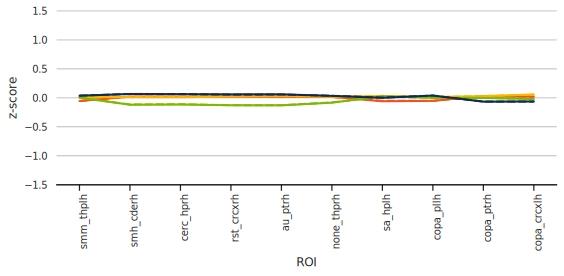

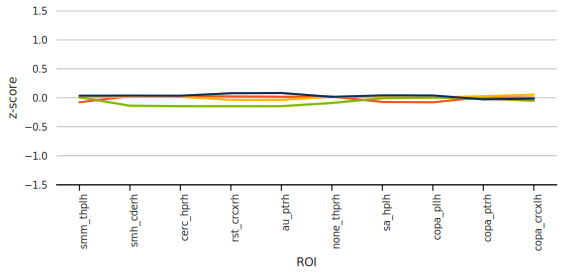

In [22]:
    
rest_both = pd.concat([sample1_rest_include.dropna().assign(Sample = 'Sample1'), 
                       sample2_rest_include.dropna().assign(Sample = 'Sample2'),
                       #fullsample_rest.assign(Sample = 'Full Sample'),
                       #di_fullsample_rest.assign(Sample = 'Dont Full Sample'),
                      ])

rest_colors = ['#f6511d', '#ffb400', '#7fb800', '#0d2c54']

plot_vars  = [
    'smm_thplh',
    'smh_cderh',
    #'smh_pllh',
    #'smh_hprh',
    'cerc_hprh',
    #'cerc_aglh',
    #'cerc_cdelh',
    #'cerc_vtdcrh',
    'rst_crcxrh',
    'au_ptrh',
    'none_thprh',
    'sa_hplh',
    'copa_pllh',
    'copa_ptrh',
    'copa_crcxlh']

#plot_vars = ['cgc_dt','ad_vs','smh_smm','cgc_n','dt_n','ad_smh','vta_vs','smh_smh',
#            'dt_dt','dt_dla','fo_smh','ad_fo','cgc_vs','cgc_cgc','ad_smm']


#line_plot(rest_both, plot_vars , rest_colors, (8,4), -1.5, 1.5, 1, save='rest/subcortical')
line_plot(rest_both, plot_vars , rest_colors, (8,4), -1.5, 1.5, 1, save='rest/subcortical')
line_plot(full_sample_rest_dont_include.assign(Sample='Sample'), plot_vars , rest_colors, (8,4), -1.5, 1.5, 1, save='rest/subcortical_dont_include')

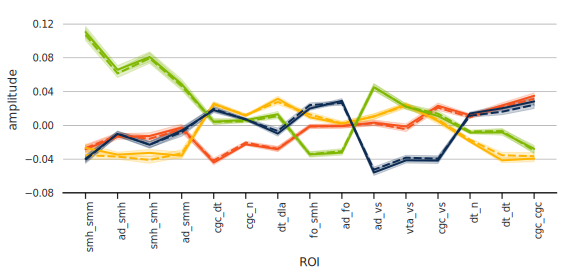

In [23]:

def line_plot(data, plot_vars, ops_cols,figsize, miny, maxy, n_clust, save=None):
    sns.set(rc={'figure.figsize':(15,10)})
    #columns = data.columns
    #columns=columns.str.replace('vs', 'visual', regex=True)
        
    from sklearn.cluster import AgglomerativeClustering
    
    cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=n_clust)
    cluster.fit_predict(data[plot_vars].T)
    order = pd.concat([pd.DataFrame(cluster.labels_), pd.DataFrame(plot_vars)], axis = 1)
    order.columns = ['order', 'var']
    order = order.sort_values(by = 'order')
    var_order = list(order['var'])
    
    data = data[['Subtype', 'Sample'] + var_order]
    
    #for col in var_order:
    #    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

    data_long = data.melt(id_vars = ['Subtype', 'Sample'])
    plt.style.use('fast') 
    sns.set_style("white")
    plt.figure(figsize=figsize)
    
    ax = sns.lineplot(data=data_long,
                      x="variable", y="value",
                      hue="Subtype", style= 'Sample', 
                      palette=ops_cols, 
                      sort= True,  
                      linewidth=2, 
                     legend=False
                     )

    #ax.grid(axis='x')
    plt.xticks(rotation = 90, ha = 'right', rotation_mode='anchor', size = 10)
    plt.yticks(size = 10)
    
    #legend = plt.legend(title = None, loc='center left', bbox_to_anchor=(1, 0.5))
    #legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.2), ncol=3)

    #for label in legend.get_texts():
    #    label.set_fontsize(10)
    
    plt.ylim((miny,maxy)) 
    plt.tight_layout()
    sns.despine(top=True, right=True, left=True)
    ax.spines['bottom'].set_color('black')
    ax.xaxis.set_ticks_position('bottom') 
    ax.set_ylabel("amplitude")
    ax.set_xlabel("ROI")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
    plt.grid(axis='y', which='both', color='gray', linestyle='-', linewidth=0.5)
   
        # Get the Matplotlib figure object
    fig = plt.gcf()

    # Set the background color
    fig.set_facecolor("white")

    if save is not None:
        plt.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/profiles/figures/'+save+'.png', 
                    format="PNG", dpi=300, facecolor='white')

top_vars = ['cgc_dt','ad_vs','smh_smm','cgc_n','dt_n','ad_smh','vta_vs','smh_smh',
            'dt_dt','dt_dla','fo_smh','ad_fo','cgc_vs','cgc_cgc','ad_smm']


line_plot(rest_both, top_vars , rest_colors, (8,4), -.08, .14, 4, save='rest/top_vars_amp')

In [24]:
#line_plot(rest_both, fullsample_rest.iloc[:, 120:140].columns.to_list(), rest_colors, (8,4), -1.5, 1.5, 4, save=None)

In [25]:
rest_names.query('Name in @plot_vars')#.drop('Name', axis=1)#.Description.to_list()

NameError: name 'rest_names' is not defined

In [ ]:
class_report('rest')

In [ ]:
#rest_pull_means = get_subtype_means(pd.concat([sample1_rest_pull, sample1_rest_pull]))
#rest_pull_means = pd.merge(rest_dict, rest_pull_means, on ='Name')
#rest_pull_means

In [ ]:
rest_demos = pd.read_csv('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/group_differences/demos_outputs/rest/rest_full_sample_table.csv')
#rest_demos

In [33]:
def adj_mat(data, sub, showfig = False, z=None):
    
    r1 = data.iloc[:, 2:]
    
    if z is not None:
        for col in r1.columns:
            r1[col] = (r1[col] - r1[col].mean())/r1[col].std(ddof=0)
   
    r1 = pd.concat([data['Subtype'], r1], axis = 1)
    r1_long = r1.groupby('Subtype').mean().reset_index()
    r1_long = r1_long[r1_long['Subtype'] == sub]
    r1_long = r1_long.drop('Subtype', axis = 1)[:1].melt()
    r1_nodes = r1_long['variable'].str.split('_', 1, expand=True)
    r1_nodes.columns = ['node1', 'node2']
    #network = pd.concat([r1_nodes, r1_long['value']], axis = 1)
    regs = uni(r1_nodes['node1'])

    def pd_fill_diagonal(df, value):
        idces = df.index.intersection(df.columns)
        stacked = df.stack(dropna=False)
        stacked.update(pd.Series(value,
                                 index=pd.MultiIndex.from_arrays([idces,
                                                                  idces])))
        df.loc[:, :] = stacked.unstack()

    parcel_row = pd.DataFrame(np.flip(np.array(r1_long['value'].T))).T
    a = np.array(parcel_row.T.iloc[:, 0: 1]).squeeze()
    n = int(np.sqrt(len(a)*2))+1
    mask = np.tri(n,dtype=bool, k=-1) # or np.arange(n)[:,None] > np.arange(n)
    out = np.zeros((n,n))
    out[mask] = a
    out = out + out.T - np.diag(np.diag(out))
    out[np.diag_indices_from(out)]
    sim_mat = pd.DataFrame(np.flip(out))
    A = np.tril(np.array(sim_mat), k=-1)
    A = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)
    A = np.array(pd.DataFrame(A)[1:])
    A = pd.DataFrame(A + A.T - np.diag(np.diag(A)))

    A.columns = regs
    A.index = regs
    
    if showfig == True:
        fig, ax = plt.subplots(figsize=(10,7))
        cmap = sns.color_palette("bwr", as_cmap=True)
        ax = sns.heatmap(A, vmin=-1.5, vmax=1.5, cmap = cmap)
    
    return A


In [34]:
import matplotlib.patches as patches
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

def net_weight(adj, threshold, save=None):

    # Parameters ------------------------------------------------------------------------------------
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    plt.style.use('default') 
    # Uncomment the next line if using Jupyter Notebook
    # %config InlineBackend.figure_format = 'svg'
    plt.rcParams["figure.autolayout"] = True # enables tight layout. Better multiplots
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Negative Weights -------------------------------------------------------------------------------
    G = nx.from_pandas_adjacency(adj)
    G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w > threshold*-1])
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    pos = nx.circular_layout(G)
    widths = [abs(i)*30 for i in weights]

    # Custom self loop
    for node in G.nodes():
        if G.has_edge(node, node):
            angle = np.arctan2(pos[node][1], pos[node][0])
            x = pos[node][0] + 0.15 * np.cos(angle)
            y = pos[node][1] + 0.15 * np.sin(angle)
            linewidth = abs(G[node][node]['weight']) * 30
            e = patches.Arc((x, y), .2, .2, angle=angle * (180 / np.pi), alpha=.6, 
                            #theta1=190, theta2=150, 
                            color="#098BF0", linewidth=linewidth)
            ax.add_patch(e)
            G.remove_edge(node, node)
    
    nx.draw(G, pos, 
            edgelist=edges,
            edge_color="#098BF0", 
            width=widths, alpha=.6,
            node_size=0)

    # Positive Weights -------------------------------------------------------------------------------
    G = nx.from_pandas_adjacency(adj)
    G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    pos = nx.circular_layout(G)
    widths = [i*30 for i in weights]

    # Custom self loop
    for node in G.nodes():
        if G.has_edge(node, node):
            angle = np.arctan2(pos[node][1], pos[node][0])
            x = pos[node][0] + 0.15 * np.cos(angle)
            y = pos[node][1] + 0.15 * np.sin(angle)
            linewidth = G[node][node]['weight'] * 30
            e = patches.Arc((x, y), .2, .2, angle=angle * (180 / np.pi), alpha=.6, 
                            #theta1=190, theta2=150, 
                            color="#F01E09", linewidth=linewidth)
            ax.add_patch(e)
            G.remove_edge(node, node)

    nx.draw(G, pos, edgelist=edges, edge_color="#F01E09", width=widths, 
            alpha=.6, 
            node_color="white",
            node_size=0)

    # Labels -----------------------------------------------------------------------------------------
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_family='sans-serif')
    ax.grid(b=None)
    
    if save is not None:
        plt.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/profiles/figures/rest/'+save+'.png', 
                    #format="PNG",  
                    savefig_kwargs={'facecolor':'white'}, dpi=300)

    plt.show()

In [35]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
%config InlineBackend.figure_format = 'svg' # makes the plots HD in the notebook
plt.rcParams["figure.autolayout"] = True # enables tigh layout. Better multiplots

def top_adj_mat(data, sub, top_vars, showfig=None):
    
    rest_cols = list(data.iloc[:, 2:].columns)
    not_top_vars = [col for col in rest_cols if col not in top_vars]
    data_mut = data.copy()
    for i in not_top_vars: data_mut[i] = 0
    mut_mat = adj_mat(data_mut, sub, showfig=showfig, z=True).fillna(0)
    
    return mut_mat

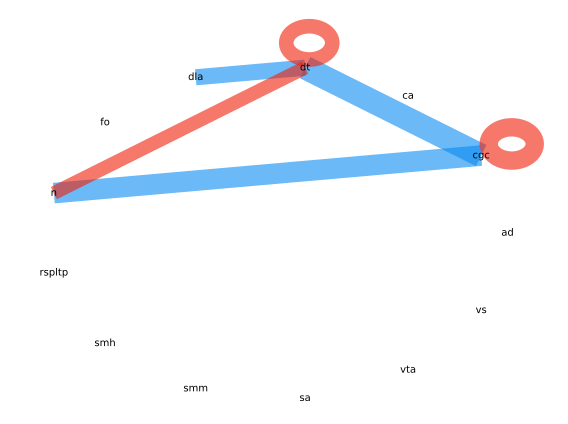

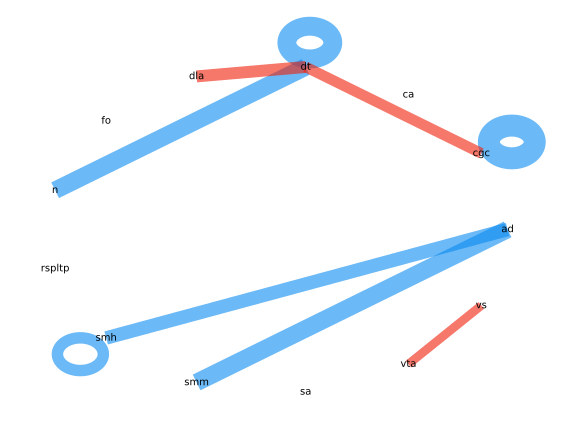

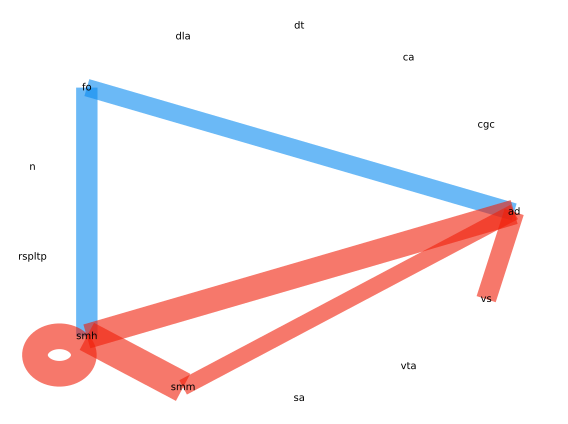

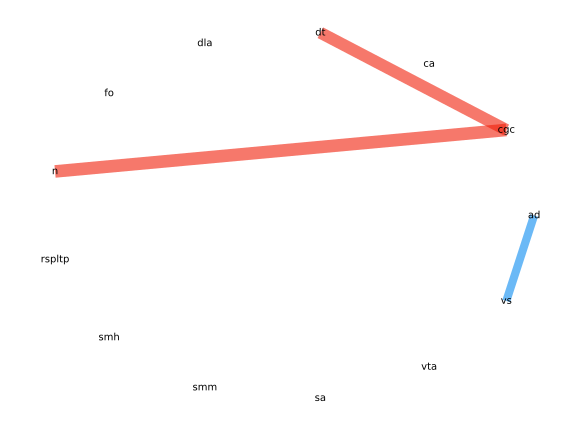

In [47]:
top_vars = ['cgc_dt','ad_vs','smh_smm','cgc_n','dt_n','ad_smh','vta_vs','smh_smh',
            'dt_dt','dt_dla','fo_smh','ad_fo','cgc_vs','cgc_cgc','ad_smm']

all_vars = full_sample_rest_include.iloc[:, 2:93].columns.to_list()

top_adj_mats = []
#sample1_rest.iloc[:, :93], 
#sample2_rest.iloc[:, :93], 
#'sample1_sub_', 'sample2_sub_',
for i,n in zip([
    full_sample_rest_dont_include.iloc[:, :93]], 
    #sample1_rest_include_fd.iloc[:, :93]],
    #sample2_rest.iloc[:, :93], 
    #fullsample_rest.iloc[:, :93]],
    #pd.concat([sample1_rest.iloc[:, :93], sample2_rest.iloc[:, :93]])],
               ['full_sample_rest_do_not_include']):
    for j in range(4):
        adj = top_adj_mat(i, j+1, top_vars)
        net_weight(adj, .27, save=n+str(j+1))
        top_adj_mats.append(adj)       

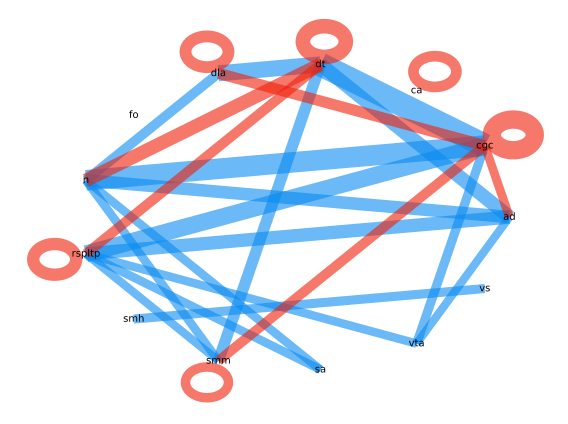

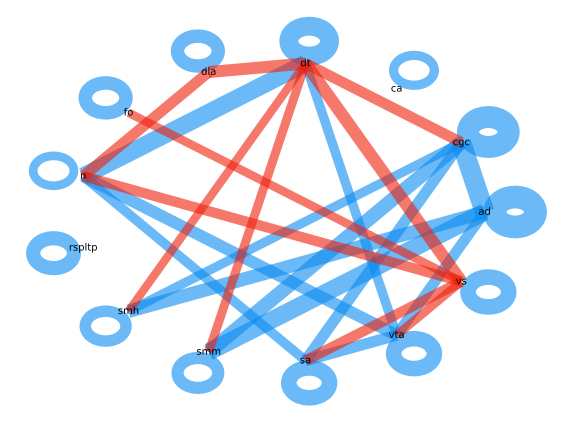

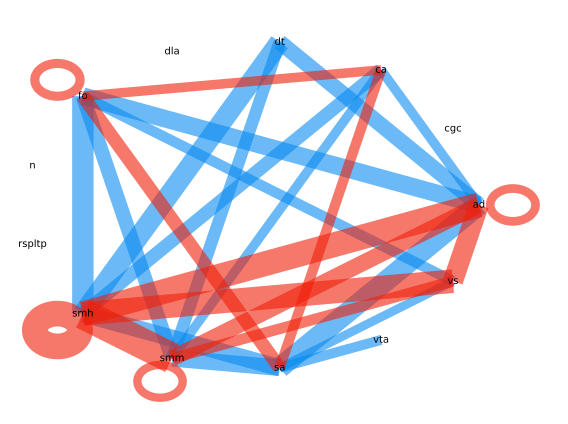

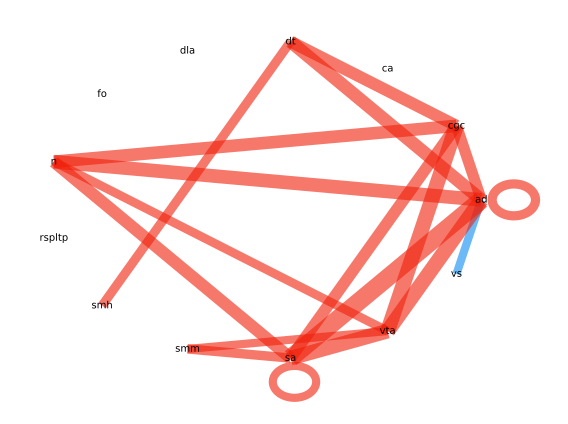

In [46]:
all_vars = full_sample_rest_include.iloc[:, 2:93].columns.to_list()
#'sample1_sub_', 'sample2_sub_',
top_adj_mats=[]
for i,n in zip([
   #full_sample_rest_include.iloc[:, :93]], 
   full_sample_rest_dont_include.iloc[:, :93]],
    #sample2_rest.iloc[:, :93], 
    #fullsample_rest.iloc[:, :93]],
    #pd.concat([sample1_rest.iloc[:, :93], sample2_rest.iloc[:, :93]])],
               ['full_sample_rest_do_not_include']):
    for j in range(4):
        adj = top_adj_mat(i, j+1, all_vars)
        net_weight(adj, .27, save=n+str(j+1)+'_thresh')
        top_adj_mats.append(adj)
    

#adj = top_adj_mat(i, 4, all_vars)
#net_weight(adj, .27, save=n+str(j+1)+'_thresh')

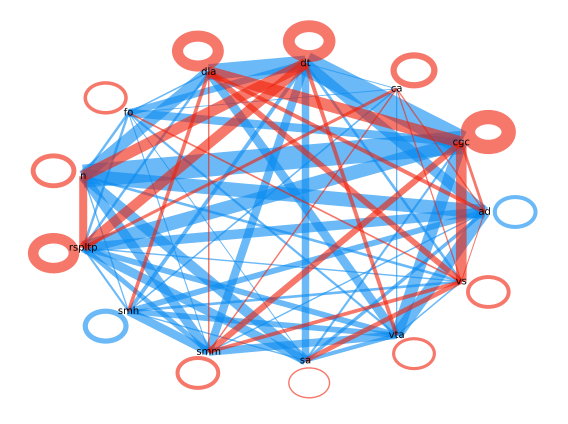

In [107]:
net_weight(adj=top_adj_mats[0], 
           threshold=.03, 
           save=None)

In [108]:
def top_adj_mat(data, sub, top_vars, showfig=None):
    
    rest_cols = list(data.iloc[:, 2:].columns)
    not_top_vars = [col for col in rest_cols if col not in top_vars]
    data_mut = data.copy()
    for i in not_top_vars: data_mut[i] = 0
    mut_mat = adj_mat(data_mut, sub, showfig=showfig, z=True).fillna(0)
    
    return mut_mat

top_vars = ['cgc_dt','ad_vs','smh_smm','cgc_n','dt_n','ad_smh','vta_vs','smh_smh',
            'dt_dt','dt_dla','fo_smh','ad_fo','cgc_vs','cgc_cgc','ad_smm']

top_adj_mats = []
#sample1_rest.iloc[:, :93], 
#sample2_rest.iloc[:, :93], 
#'sample1_sub_', 'sample2_sub_',
for i,n in zip([
    #full_sample_rest_include.iloc[:, :93]], 
    full_sample_rest_dont_include.iloc[:, :93]], 
    #sample1_rest_include_fd.iloc[:, :93]],
    #sample2_rest.iloc[:, :93], 
    #fullsample_rest.iloc[:, :93]],
    #pd.concat([sample1_rest.iloc[:, :93], sample2_rest.iloc[:, :93]])],
               ['sample1_rest_include_fd']):
    for j in range(4):
        adj = top_adj_mat(i, j+1, top_vars)
        top_adj_mats.append(adj)       
        

print('Z-Scored Network Weights --------------------------------')
print('Positive')
print(pd.concat(top_adj_mats).melt().query('value > 0').max())
print(pd.concat(top_adj_mats).melt().query('value > 0').min())
print('Negative')
print(pd.concat(top_adj_mats).melt().query('value < 0').max())
print(pd.concat(top_adj_mats).melt().query('value < 0').min())


top_adj_mats = []
#sample1_rest.iloc[:, :93], 
#sample2_rest.iloc[:, :93], 
#'sample1_sub_', 'sample2_sub_',
for i,n in zip([
     #full_sample_rest_include.iloc[:, :93]], 
    full_sample_rest_dont_include.iloc[:, :93]], 
    #sample1_rest_include_fd.iloc[:, :93]],
    #sample2_rest.iloc[:, :93], 
    #fullsample_rest.iloc[:, :93]],
    #pd.concat([sample1_rest.iloc[:, :93], sample2_rest.iloc[:, :93]])],
               ['sample1_rest_include_fd']):
    for j in range(4):
        adj = top_adj_mat(i, j+1, top_vars)
        top_adj_mats.append(adj)       
        
print('')
print('Amp Network Weights --------------------------------------')
print('Positive')
print(pd.concat(top_adj_mats).melt().query('value > 0').max())
print(pd.concat(top_adj_mats).melt().query('value > 0').min())
print('Negative')
print(pd.concat(top_adj_mats).melt().query('value < 0').max())
print(pd.concat(top_adj_mats).melt().query('value < 0').min())

Z-Scored Network Weights --------------------------------
Positive
variable         vta
value       1.023696
dtype: object
variable          ad
value       0.001708
dtype: object
Negative
variable         vta
value      -0.013698
dtype: object
variable          ad
value      -0.789443
dtype: object

Amp Network Weights --------------------------------------
Positive
variable         vta
value       1.023696
dtype: object
variable          ad
value       0.001708
dtype: object
Negative
variable         vta
value      -0.013698
dtype: object
variable          ad
value      -0.789443
dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs = axs.ravel()
#gs = gridspec.GridSpec(1, 4, hspace=1)  # Adjust hspace here

for i in range(4):
    ax = axs[i]
    sns.heatmap(top_adj_mats[i], center=0, cmap='bwr', ax=ax, 
                vmin = -.05, vmax = .06,
                annot=False)
    ax.tick_params(labelsize=11)  # Adjust label size here
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)  # Rotate x-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Rotate y-axis labels


plt.tight_layout()
plt.savefig('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/profiles/figures/rest/full_sample_include_amp_cortical.png',
                    #format="PNG",  
                    savefig_kwargs={'facecolor':'white'}, dpi=300)
plt.show()

In [ ]:
def uni_adj_mat(data, ids, showfig=False):
    r1 = data.iloc[:, 2:]

    for col in r1.columns:
            r1[col] = (r1[col] - r1[col].mean())/r1[col].std(ddof=0)

    r1_long = pd.concat([data[['ID', 'Subtype']], r1], axis = 1)
    r1_long = r1_long[r1_long['ID'] == ids]
    #r1_long = r1_long[r1_long['Subtype'] == sub]
    r1_long = r1_long.drop(['ID', 'Subtype'], axis = 1)[:1].melt()
    r1_nodes = r1_long['variable'].str.split('_', 1, expand=True)
    r1_nodes.columns = ['node1', 'node2']
    regs = uni(r1_nodes['node1'])
    def pd_fill_diagonal(df, value):
            idces = df.index.intersection(df.columns)
            stacked = df.stack(dropna=False)
            stacked.update(pd.Series(value,
                                     index=pd.MultiIndex.from_arrays([idces,
                                                                      idces])))
            df.loc[:, :] = stacked.unstack()

    parcel_row = pd.DataFrame(np.flip(np.array(r1_long['value'].T))).T
    a = np.array(parcel_row.T.iloc[:, 0: 1]).squeeze()
    n = int(np.sqrt(len(a)*2))+1
    mask = np.tri(n,dtype=bool, k=-1) # or np.arange(n)[:,None] > np.arange(n)
    out = np.zeros((n,n))
    out[mask] = a
    out = out + out.T - np.diag(np.diag(out))
    out[np.diag_indices_from(out)]
    sim_mat = pd.DataFrame(np.flip(out))
    A = np.tril(np.array(sim_mat), k=-1)
    A = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)
    A = np.array(pd.DataFrame(A)[1:])
    A = pd.DataFrame(A + A.T - np.diag(np.diag(A)))

    A.columns = regs
    A.index = regs

    if showfig == True:
        fig, ax = plt.subplots(figsize=(10,7))
        cmap = sns.color_palette("Spectral_r", as_cmap=True)
        ax = sns.heatmap(A, vmin=-1.5, vmax=1.5, cmap = cmap)
    
    return(A)



In [ ]:
uni_ids = list(df1_rest['ID'])
uni_list_mat = []
uni_ids[1] 
for i in uni_ids:
    uni_list_mat.append(uni_adj_mat(sample1_rest, i))